In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df1 = pd.read_csv('client_data (1).csv')
df2 = pd.read_csv('price_data (1).csv')

In [4]:
df1.head(10)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,...,f,0.00,12.82,12.82,1,42.59,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,...,f,219.59,33.42,33.42,1,329.60,6,lxidpiddsbxsbosboudacockeimpuepw,31.500,0


In [5]:
df2.head(10)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0
5,038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.0,0.0,44.266930,0.0,0.0
6,038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.0,0.0,44.444710,0.0,0.0
7,038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.0,0.0,44.444710,0.0,0.0
8,038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.0,0.0,44.444710,0.0,0.0
9,038af19179925da21a25619c5a24b745,2015-10-01,0.145859,0.0,0.0,44.444710,0.0,0.0


# Descripive Statistics of Data

In [17]:
print("Rows and Columns of Client Data :- ", df1.shape)
print("Rows and Columns of Price Data :- ", df2.shape)

Rows and Columns of Client Data :-  (14606, 26)
Rows and Columns of Price Data :-  (193002, 8)


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


No missing values from client and price data, but we need to convert false datatype

In [18]:
# convert datetime feature in df1
for f in ['date_activ','date_end','date_modif_prod','date_renewal']:
    df1[f] = pd.to_datetime(df1[f])

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [14]:
#converting datetime feature in df2
df2['price_date'] = pd.to_datetime(df2['price_date'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [20]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,14606.0,159220.286252,573465.264198,0.0,5674.750000,14115.500000,40763.750000,6.207104e+06
cons_gas_12m,14606.0,28092.375325,162973.059057,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,14606.0,16090.269752,64364.196422,0.0,0.000000,792.500000,3383.000000,7.712030e+05
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,8.290283e+04
forecast_cons_year,14606.0,1399.762906,3247.786255,0.0,0.000000,314.000000,1745.750000,1.753750e+05
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,5.993100e+02
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [21]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221


We have highly skewed client data, as exhibited by the percentile values.

# Exploratory Data Analysis (EDA)

In [22]:
colors = plt.cm.tab10.colors

## 1. Churn Distribution

In [25]:
#change churn status column
df1['churn2'] = df1['churn']
df1['churn2'] = df1['churn2'].astype('string')
df1['churn2'] = df1['churn2'].apply(lambda x: x.replace('0', 'No'))
df1['churn2'] = df1['churn2'].apply(lambda x: x.replace('1', 'Yes'))
df1.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,churn2
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,Yes
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,No
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,No
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,No
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,No


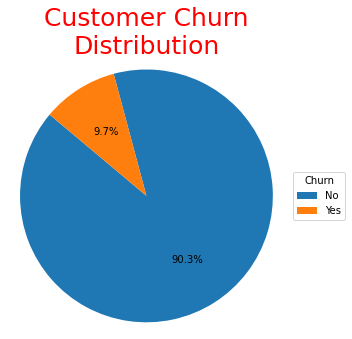

In [26]:
churn_counts = df1['churn2'].value_counts()

# Build a pie chart of churn distribution
plt.figure(figsize=(5, 5))
plt.pie(churn_counts, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Customer Churn\nDistribution", fontsize = 25, color = 'Red')
plt.axis('equal')  # Membuat lingkaran menjadi lingkaran penuh
plt.legend(title="Churn", labels=['No', 'Yes'], loc="center right", bbox_to_anchor = (1.23,0.5))

plt.show()

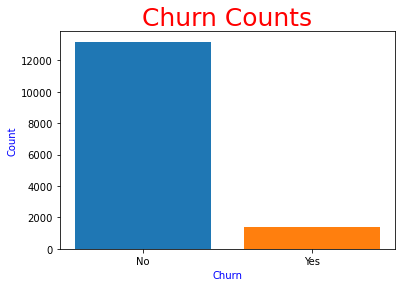

In [30]:
#build bar chart of customer churn distribution

plt.bar(churn_counts.index, churn_counts.values, color=colors)
plt.xlabel('Churn', color = 'b')
plt.ylabel('Count', color = 'b')
plt.title('Churn Counts', fontsize = 25, color = 'Red')

plt.show()

It was found that 9.7% of the customers have churned and 90.3% of the customers have not churned.

## 2. Churn per Sales Channel

In [32]:
#I just want to know
salesc_counts = df1['channel_sales'].value_counts()

salesc_counts

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

I can make bar chart of this

In [52]:
#encode sales channel to better understanding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1['channel_sales2'] = label_encoder.fit_transform(df1['channel_sales'])

# Display the mapping of original labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'MISSING': 0, 'epumfxlbckeskwekxbiuasklxalciiuu': 1, 'ewpakwlliwisiwduibdlfmalxowmwpci': 2, 'fixdbufsefwooaasfcxdxadsiekoceaa': 3, 'foosdfpfkusacimwkcsosbicdxkicaua': 4, 'lmkebamcaaclubfxadlmueccxoimlema': 5, 'sddiedcslfslkckwlfkdpoeeailfpeds': 6, 'usilxuppasemubllopkaafesmlibmsdf': 7}


In [59]:
channel = df1[['id', 'channel_sales2', 'churn']]
channel = channel.groupby([channel['channel_sales2'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

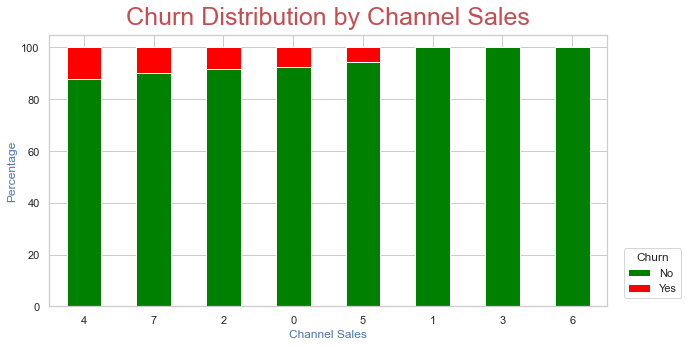

In [274]:
# Plotting the stacked bar chart
channel_churn.plot(kind='bar', stacked=True, color=['green', 'red'], figsize=(10,5))
plt.xlabel('Channel Sales', color = 'b')
plt.xticks(rotation = 0)
plt.ylabel('Percentage', color = 'b')
plt.title('Churn Distribution by Channel Sales', color= 'r', fontsize = 25, pad = 10)
plt.legend(title='Churn', loc=(1.03, 0.03), labels=['No', 'Yes'])

plt.show()

There is a missing value added by the team. This feature could be an important when it comes to building our model.

Sales Channel 'foosdfpfkusacimwkcsosbicdxkicaua' have the most customer churn.

## 3. Consumption Distribution

In [75]:
consum = df1[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
consum.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,0.00,t,1
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0


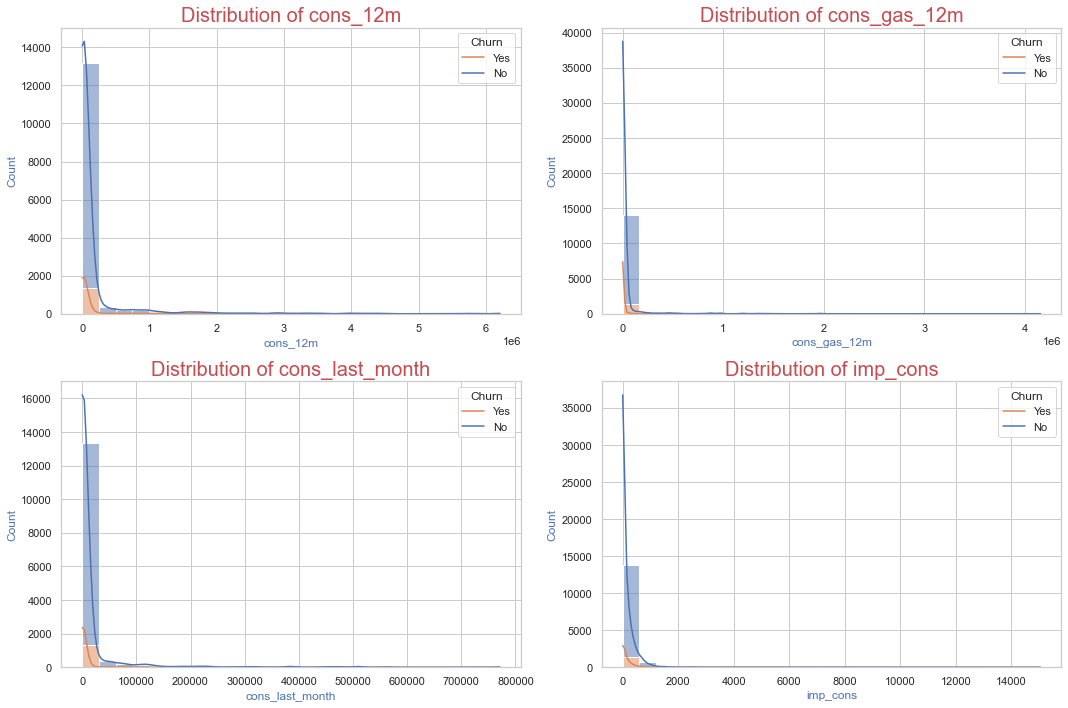

In [96]:
#selecting
selected_columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'churn']
consum_subset = consum[selected_columns]

# build plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes = axes.flatten()

for i, column in enumerate(selected_columns[:-1]):  # Exclude 'churn' from the loop
    sns.histplot(data=consum_subset, x=column, bins=25, kde=True, hue='churn', multiple='stack', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=20, color='r')  # Adjust title size and color
    axes[i].legend(title='Churn', labels=['Yes', 'No'])
    axes[i].set_xlabel(column, color = 'b')
    axes[i].set_ylabel('Count', color = 'b')

plt.tight_layout()

plt.show()

In [107]:
consum2 = df1[['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'churn2']]
consum2.head(3)

,cons_12m,cons_gas_12m,cons_last_month,imp_cons,churn2
0,0,54946,0,0.0,Yes
1,4660,0,0,0.0,No
2,544,0,0,0.0,No


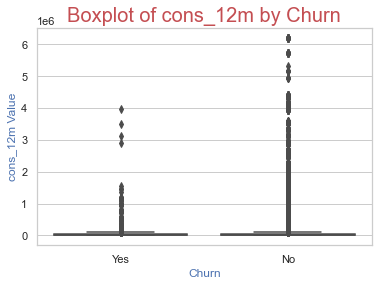

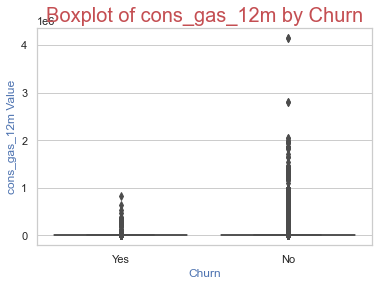

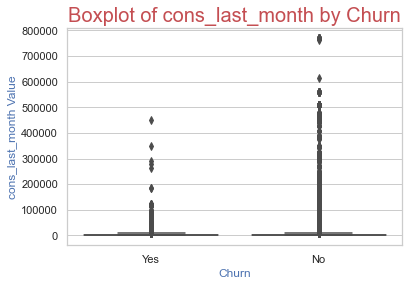

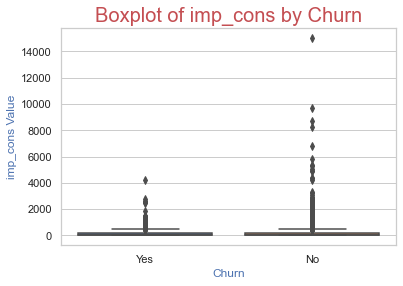

In [115]:
#Build boxplot
for col in consum2.columns[:-1]:  # Exclude 'churn2' from the loop
    try:
        sns.boxplot(x='churn2', y=col, data=consum2)
        plt.title(f'Boxplot of {col} by Churn', fontsize = 20, color = 'r')
        plt.ylabel(f'{col} Value', color='b')
        plt.xlabel('Churn', color = 'b')
        plt.show()
    except TypeError as e:
        print(f"Error plotting {col}: {e}")

The consumption data is positively skewed and has a very long right tail toward the upper values of the distribution.

## 3. Consumption Forecast Distribution

In [123]:
fr = df1[['id', 'forecast_cons_12m', 'forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m',
    'forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'churn']]

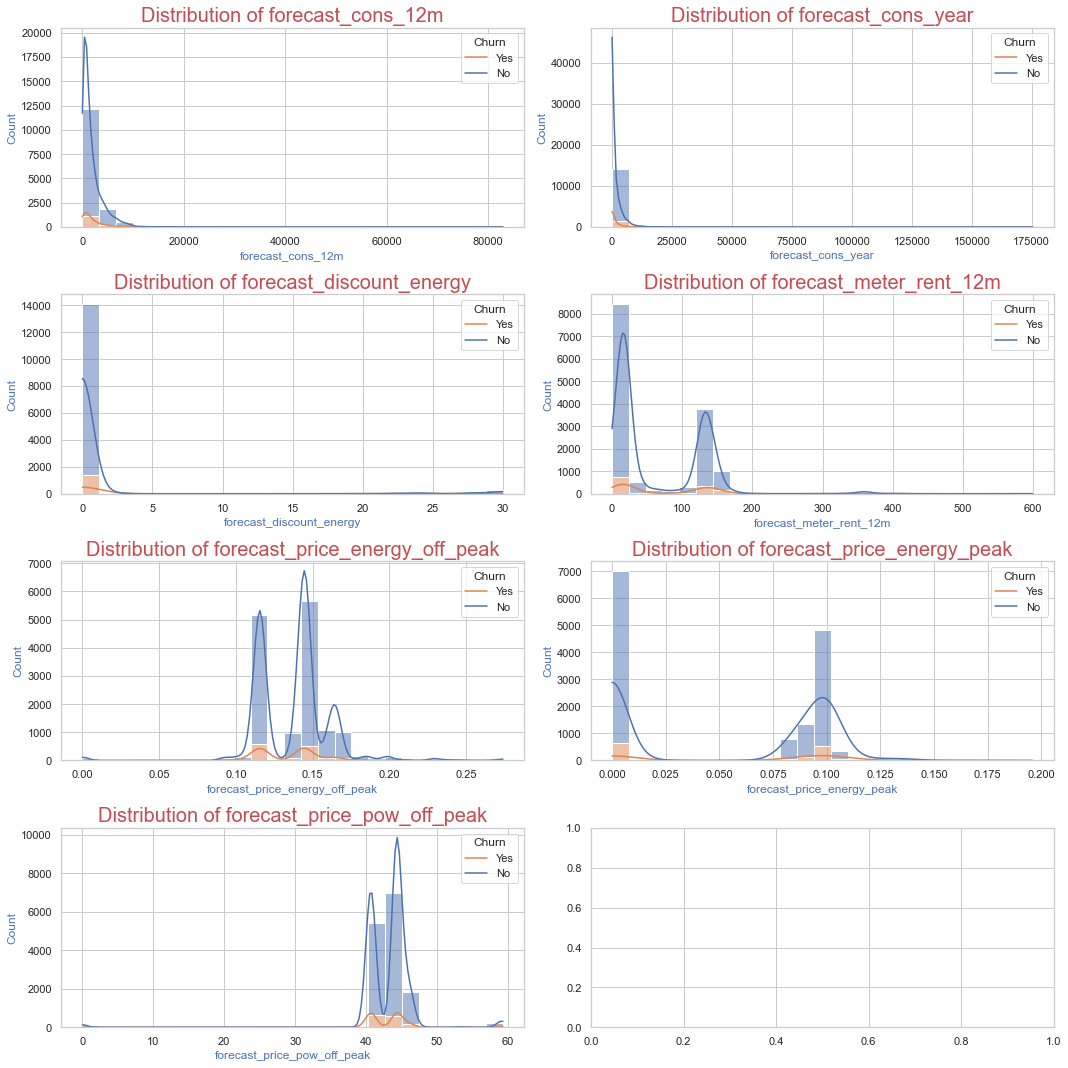

In [132]:
#selecting
selected_columns2 = ['forecast_cons_12m', 'forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m',
                    'forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'churn']
fr_subset = fr[selected_columns2]

#build plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

axes = axes.flatten()

for i, column in enumerate(selected_columns2[:-1]):  # Exclude 'churn' from the loop
    sns.histplot(data=fr_subset, x=column, bins=25, kde=True, hue='churn', multiple='stack', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}', fontsize=20, color='r')  # Adjust title size and color
    axes[i].legend(title='Churn', labels=['Yes', 'No'])
    axes[i].set_xlabel(column, color='b')
    axes[i].set_ylabel('Count', color='b') 

plt.tight_layout()

plt.show()

In [134]:
fr2 = df1[['forecast_cons_12m', 'forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m',
           'forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'churn2']]

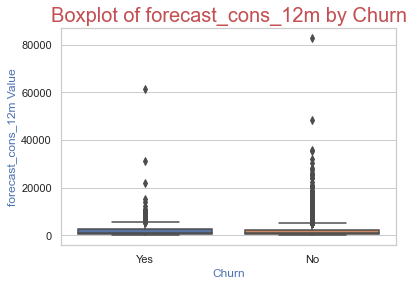

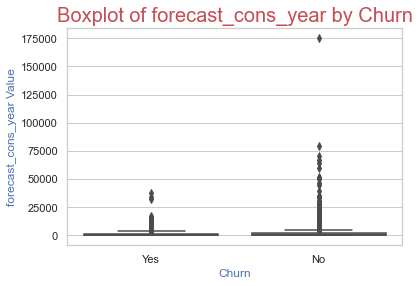

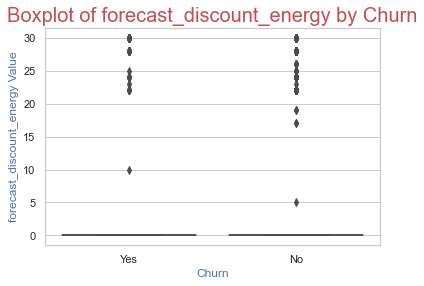

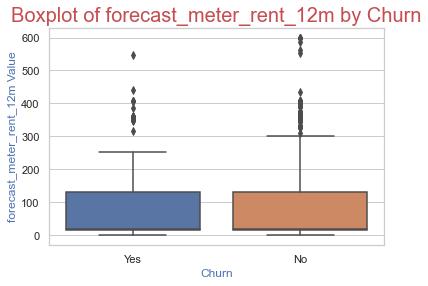

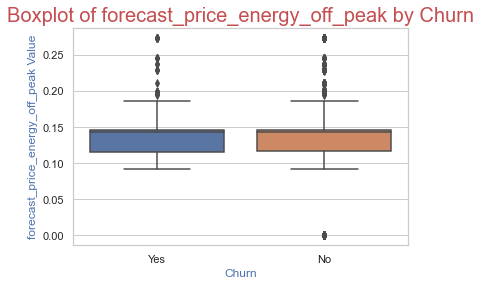

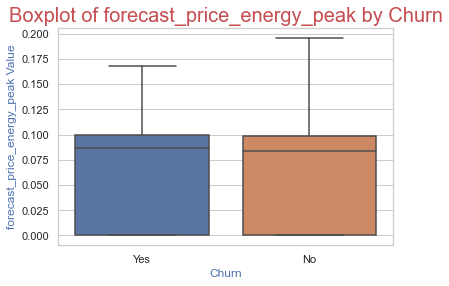

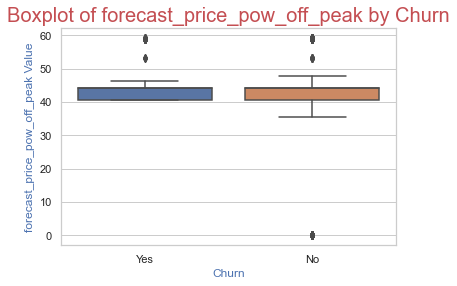

In [135]:
for col in fr2.columns[:-1]:  # Exclude 'churn2' from the loop
    try:
        sns.boxplot(x='churn2', y=col, data=fr2)
        plt.title(f'Boxplot of {col} by Churn', fontsize = 20, color = 'r')
        plt.ylabel(f'{col} Value', color='b')
        plt.xlabel('Churn', color = 'b')
        plt.show()
    except TypeError as e:
        print(f"Error plotting {col}: {e}")

The forecasted data mostly have positively skewed and has a very long right tail toward the upper values of the distribution.

## 5. Contract Type

In [139]:
contract = df1.groupby(['churn2', 'has_gas'])['id'].count().unstack()
contract

has_gas,f,t
churn2,,
No,10753,2434
Yes,1202,217


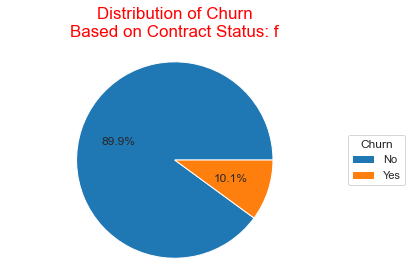

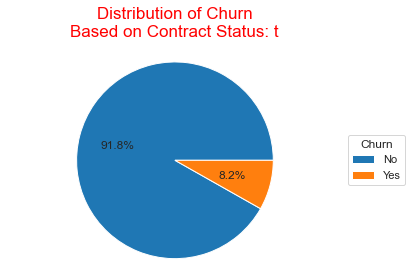

In [141]:
# Membuat diagram pie chart untuk setiap jenis kolom
for col in contract.columns[0:]:
    plt.figure()
    wedges, texts, autotexts = plt.pie(contract[col], 
                                       autopct='%1.1f%%', 
                                       colors=colors)
    plt.title(f'Distribution of Churn\nBased on Contract Status: {col}', fontsize=17, pad=15, color = 'red')
    plt.axis('equal')

    # Create a legend based on the pie chart labels
    plt.legend(wedges, 
               contract[col].index,
               title='Churn', 
               loc='center left',
               bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

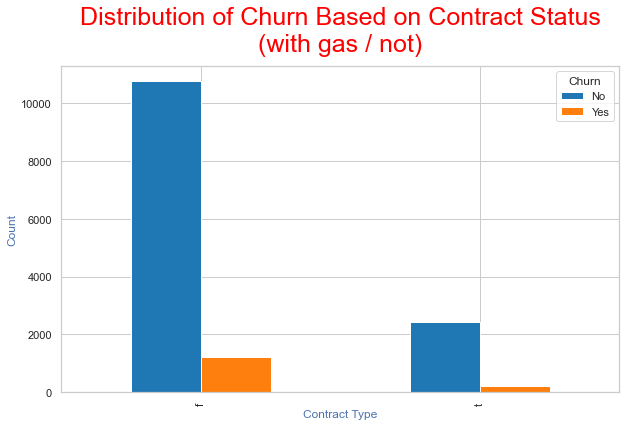

In [204]:
ax = contract.T.plot(kind='bar', stacked=False, figsize=(10, 6), color=colors)

# Adding labels and title
plt.title('Distribution of Churn Based on Contract Status\n(with gas / not)', fontsize=25, pad=15, color='red')
plt.xlabel('Contract Type', color = 'b')
plt.ylabel('Count', color = 'b')

# Adding legend
plt.legend(title='Churn', loc='upper right')

# Show the plot
plt.show()

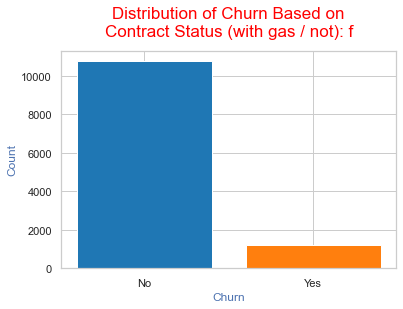

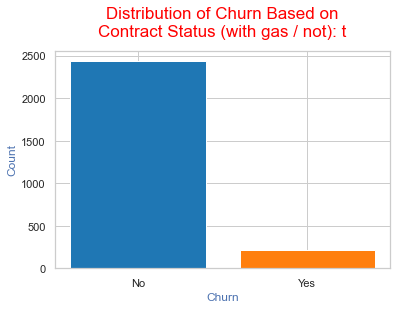

In [209]:
#for practice
for col in contract.columns[0:]:
    plt.figure()
    plt.bar(contract.index, contract[col], color=colors)
    
    plt.title(f'Distribution of Churn Based on\nContract Status (with gas / not): {col}', fontsize=17, pad=15, color='red')
    plt.xlabel('Churn', color = 'b')
    plt.ylabel('Count', color = 'b')
    
    plt.show()

From pie chart, without gas contract have higher percentage of churn than with gas contract.

## 6. Subscribed Power

In [163]:
subspw = df1[['id', 'pow_max', 'churn']]
subspw.head(3)

,id,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,13.856,0


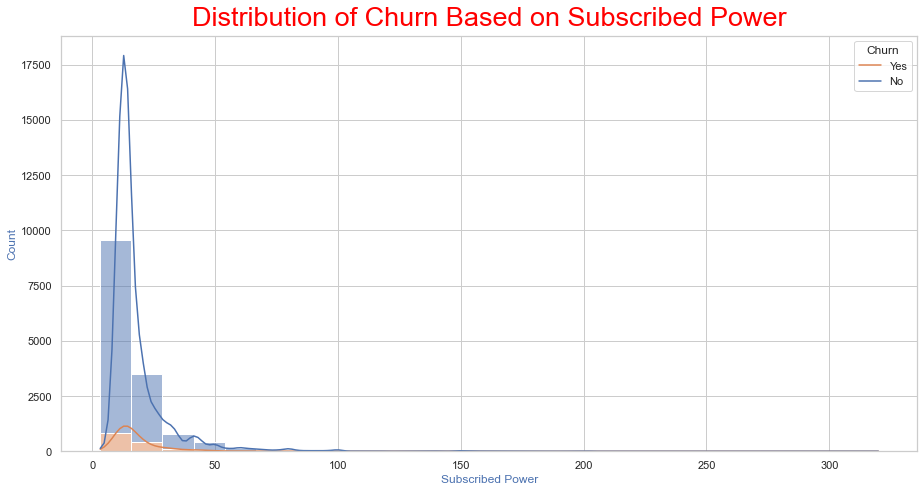

In [201]:
plt.figure(figsize=(13, 7))
sns.histplot(data=subspw, x='pow_max', bins=25, kde=True, hue='churn', multiple='stack')

plt.title('Distribution of Churn Based on Subscribed Power', fontsize=27, color='red', pad = 10)
plt.xlabel('Subscribed Power', color='b')
plt.ylabel('Count', color='b')
plt.legend(title='Churn', labels=['Yes', 'No'])

plt.tight_layout()
plt.show()

In [221]:
subspw2 = df1[['pow_max', 'churn2']]
subspw2.head(3)

,pow_max,churn2
0,43.648,Yes
1,13.800,No
2,13.856,No


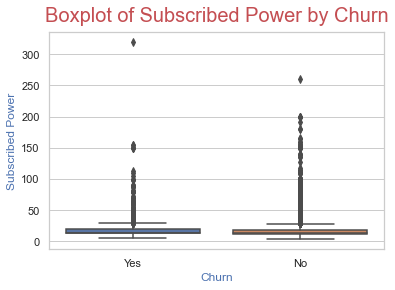

In [223]:
sns.boxplot(x='churn2', y=col, data=subspw2)
plt.title(f'Boxplot of Subscribed Power by Churn', fontsize = 20, color = 'r', pad = 10)
plt.ylabel('Subscribed Power', color='b')
plt.xlabel('Churn', color = 'b')
#plt.legend(title='Churn', labels=['Yes', 'No'])
        
plt.show()

In [188]:
subspwmean = df1.groupby(['pow_max', 'churn2']).size().unstack().mean()
subspwmean

churn2
No     20.132824
Yes     6.693396
dtype: float64

[]

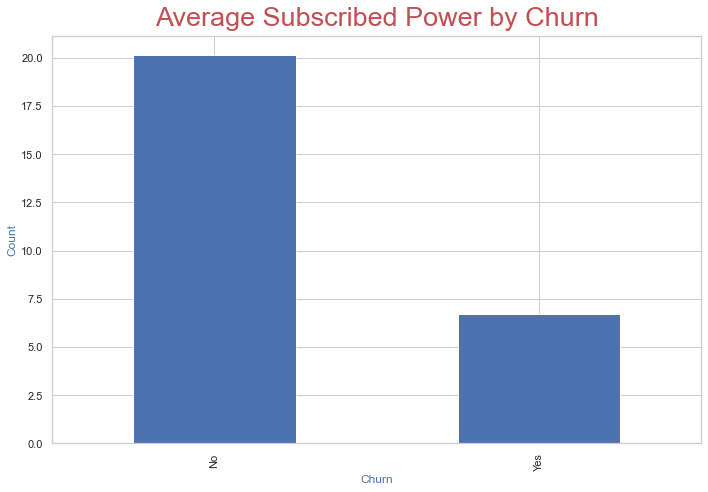

In [202]:
ax = subspwmean.plot(kind = 'bar', figsize = (10,7))
plt.title('Average Subscribed Power by Churn', color = 'r', fontsize = 27, pad = 10)
plt.ylabel('Count', color = 'b')
plt.xlabel('Churn', color = 'b')

plt.tight_layout()

plt.plot()

The subscripted power data is positively skewed and has a very long right tail toward the upper values of the distribution. From barplots, clients with lower power subscription tends to churn.

## 7. Margin

In [212]:
margin = df1[['id', 'net_margin', 'churn']]
margin.head(3)

,id,net_margin,churn
0,24011ae4ebbe3035111d65fa7c15bc57,678.99,1
1,d29c2c54acc38ff3c0614d0a653813dd,18.89,0
2,764c75f661154dac3a6c254cd082ea7d,6.60,0


In [213]:
marginmean = df1.groupby(['net_margin', 'churn2']).size().unstack().mean()
marginmean

churn2
No     1.202974
Yes    1.034257
dtype: float64

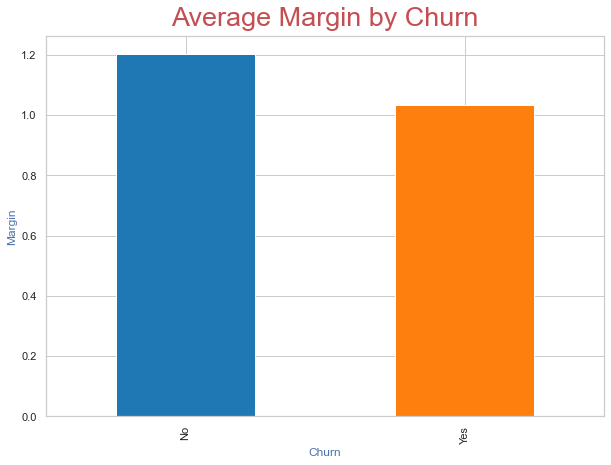

In [228]:
ax = marginmean.plot(kind = 'bar', figsize = (10,7), color = colors)

plt.title('Average Margin by Churn', fontsize = 27, color = 'r', pad = 10)
plt.ylabel('Margin', color = 'b')
plt.xlabel('Churn', color = 'b')

plt.show()

## 8. Price Timeline

In [229]:
pr = df2['id'].value_counts().value_counts()
pr

12    15990
11       83
10       11
9         6
8         3
7         3
Name: id, dtype: int64

Most customers have a 12-month price records each. After checking, every customer has the last-month's reocrd (2015-12-01), this will be helpful in identifying price sensitivity.

In [230]:
df2['price_date'].value_counts()

2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: price_date, dtype: int64

In [239]:
# just take per month
# Mengelompokkan data per bulan dan menghitung rata-rata atau fungsi lainnya
df2_monthly = df2.resample('M', on='price_date').mean()
df2_monthly

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
price_date,,,,,,
2015-01-31,0.142568,0.054950,0.030333,43.226643,10.692921,6.455861
2015-02-28,0.142767,0.055053,0.030367,43.238161,10.673719,6.449016
2015-03-31,0.143104,0.055118,0.030396,43.254033,10.644489,6.430121
2015-04-30,0.143259,0.056035,0.030492,43.288439,10.647277,6.423156
2015-05-31,0.143534,0.055359,0.030393,43.315388,10.602453,6.390806
2015-06-30,0.143731,0.055255,0.029902,43.347320,10.415769,6.281304
2015-07-31,0.143683,0.055369,0.030636,43.345012,10.642236,6.421464
2015-08-31,0.137933,0.053605,0.030717,43.365366,10.661678,6.431518
2015-09-30,0.137933,0.053532,0.030606,43.351874,10.602979,6.391788


In [240]:
df2_monthly.columns

Index(['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

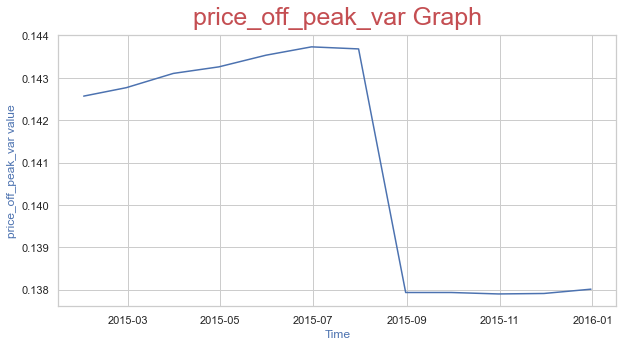

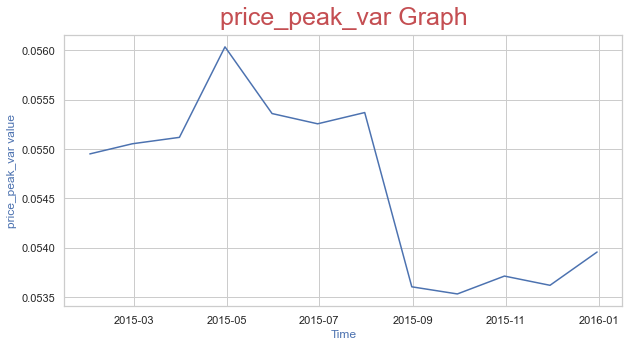

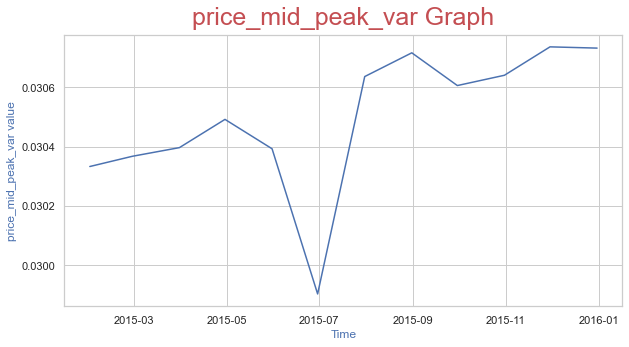

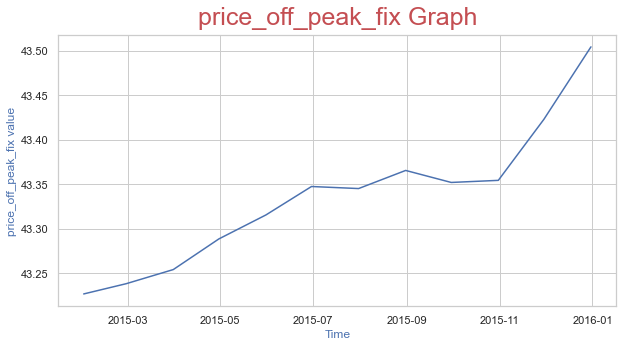

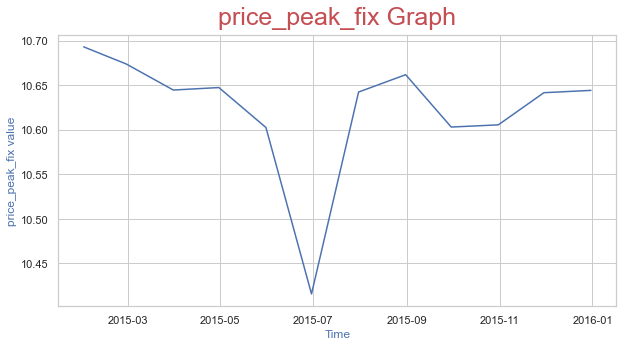

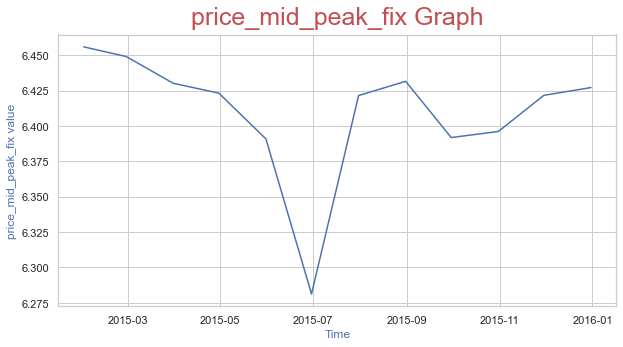

In [248]:
for col in df2_monthly.columns[0:]:
    plt.figure(figsize = (10,5))
    plt.plot(df2_monthly.index, df2_monthly[col])
    plt.title(f'{col} Graph', fontsize = 25,color = 'r', pad = 10)
    plt.ylabel(f'{col} value', color = 'b')
    plt.xlabel('Time', color = 'b')
    
    plt.show()
    

This graph is good

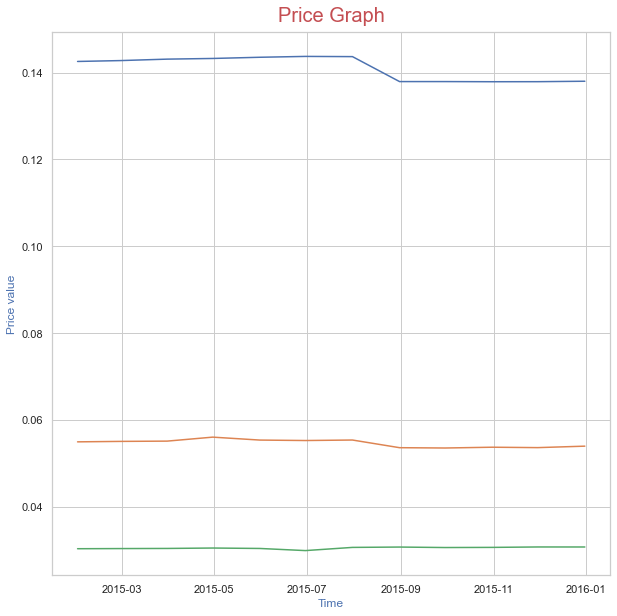

In [247]:
plt.figure(figsize = (10,10))
plt.plot(df2_monthly.index, df2_monthly['price_off_peak_var'], label='price of energy for the 1st period (off peak)')
plt.plot(df2_monthly.index, df2_monthly['price_peak_var'], label='price of energy for the 2nd period (peak)')
plt.plot(df2_monthly.index, df2_monthly['price_mid_peak_var'], label='price of energy for the 3nd period (mid peak)')
#plt.plot(df2_monthly.index, df2_monthly['price_off_peak_fix'], label='price of power for the 1st period (off peak)')
#plt.plot(df2_monthly.index, df2_monthly['price_peak_fix'], label=' price of power for the 2nd period (peak)')
#plt.plot(df2_monthly.index, df2_monthly['price_mid_peak_fix'], label='price of power for the 3rd period (mid peak)')
plt.title('Price Graph', fontsize = 20, color = 'r', pad = 10)
plt.ylabel('Price value', color = 'b')
plt.xlabel('Time', color = 'b')

plt.show()

this graph is not good -_-

From the first graph, founded that ...
1. price of energy for the 1st and 2nd period have somewhat similar pattern, the price significantly decrease in September 2015 and tends to be stable after that.
2. price of power for the 2nd and 3rd period with price of energy or the 3rd period have somewhat similar pattern, the price significantly decrease in July 2015 but come back significantly rise after that.
3. price of power for the 1st period have different pattern than others. The price tends to rise from early 2015 to early 2016.

# Hypothesis Investigation

In [252]:
# Create mean average data
pmeany = df2.groupby(['id']).mean().reset_index()
pmean6m = df2[df2['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
pmean3m = df2[df2['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [253]:
#renaming
pmeany = pmeany.rename(columns={ "price_off_peak_var": "mean_year_price_off_peak_var",
                                "price_peak_var": "mean_year_price_peak_var",
                                "price_mid_peak_var": "mean_year_price_mid_peak_var",
                                "price_off_peak_fix": "mean_year_price_off_peak_fix",
                                "price_peak_fix": "mean_year_price_peak_fix",
                                "price_mid_peak_fix": "mean_year_price_mid_peak_fix"}
)

pmeany["mean_year_price_off_peak"] = pmeany["mean_year_price_off_peak_var"] + pmeany["mean_year_price_off_peak_fix"]
pmeany["mean_year_price_peak"] = pmeany["mean_year_price_peak_var"] + pmeany["mean_year_price_peak_fix"]
pmeany["mean_year_price_med_peak"] = pmeany["mean_year_price_mid_peak_var"] + pmeany["mean_year_price_mid_peak_fix"]

In [254]:
pmean6m = pmean6m.rename( columns={ "price_off_peak_var": "mean_6m_price_off_peak_var",
                                   "price_peak_var": "mean_6m_price_peak_var",
                                   "price_mid_peak_var": "mean_6m_price_mid_peak_var",
                                   "price_off_peak_fix": "mean_6m_price_off_peak_fix",
                                   "price_peak_fix": "mean_6m_price_peak_fix",
                                   "price_mid_peak_fix": "mean_6m_price_mid_peak_fix"}
)

pmean6m["mean_6m_price_off_peak"] = pmean6m["mean_6m_price_off_peak_var"] + pmean6m["mean_6m_price_off_peak_fix"]
pmean6m["mean_6m_price_peak"] = pmean6m["mean_6m_price_peak_var"] + pmean6m["mean_6m_price_peak_fix"]
pmean6m["mean_6m_price_med_peak"] = pmean6m["mean_6m_price_mid_peak_var"] + pmean6m["mean_6m_price_mid_peak_fix"]

In [255]:
pmean3m = pmean3m.rename( columns={ "price_off_peak_var": "mean_3m_price_off_peak_var",
                                   "price_peak_var": "mean_3m_price_peak_var",
                                   "price_mid_peak_var": "mean_3m_price_mid_peak_var",
                                   "price_off_peak_fix": "mean_3m_price_off_peak_fix",
                                   "price_peak_fix": "mean_3m_price_peak_fix",
                                   "price_mid_peak_fix": "mean_3m_price_mid_peak_fix"}
)

pmean3m["mean_3m_price_off_peak"] = pmean3m["mean_3m_price_off_peak_var"] + pmean3m["mean_3m_price_off_peak_fix"]
pmean3m["mean_3m_price_peak"] = pmean3m["mean_3m_price_peak_var"] + pmean3m["mean_3m_price_peak_fix"]
pmean3m["mean_3m_price_med_peak"] = pmean3m["mean_3m_price_mid_peak_var"] + pmean3m["mean_3m_price_mid_peak_fix"]

In [258]:
# Merge all
df3 = pd.merge(pmeany, pmean6m, on='id')
df3 = pd.merge(df3, pmean3m, on='id')

df3.head(10)

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,...,mean_6m_price_med_peak,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_med_peak
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000
5,00126c87cf78d7604278f0a9adeb689e,0.119806,0.099417,0.070304,40.661003,24.396601,16.264402,40.780810,24.496018,16.334707,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
6,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,16.367024,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015
7,00184e957277eeef733a7b563fdabd06,0.147637,0.000000,0.000000,44.266930,0.000000,0.000000,44.414568,0.000000,0.000000,...,0.000000,0.145093,0.000000,0.000000,44.266930,0.00000,0.000000,44.412023,0.000000,0.000000
8,001987ed9dbdab4efa274a9c7233e1f4,0.122756,0.102290,0.073030,40.647427,24.388455,16.258972,40.770183,24.490746,16.332002,...,16.366080,0.118175,0.100491,0.074516,40.728885,24.43733,16.291555,40.847060,24.537821,16.366071
9,0019baf3ed1242cd99b3cb592030446f,0.267449,0.000000,0.000000,57.961930,0.000000,0.000000,58.229380,0.000000,0.000000,...,0.000000,0.275124,0.000000,0.000000,59.206930,0.00000,0.000000,59.482054,0.000000,0.000000


In [259]:
mergedf = pd.merge(df3, df1[['id', 'churn']], on='id')
mergedf.head()

,id,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


## 1. Price Correation w Churn

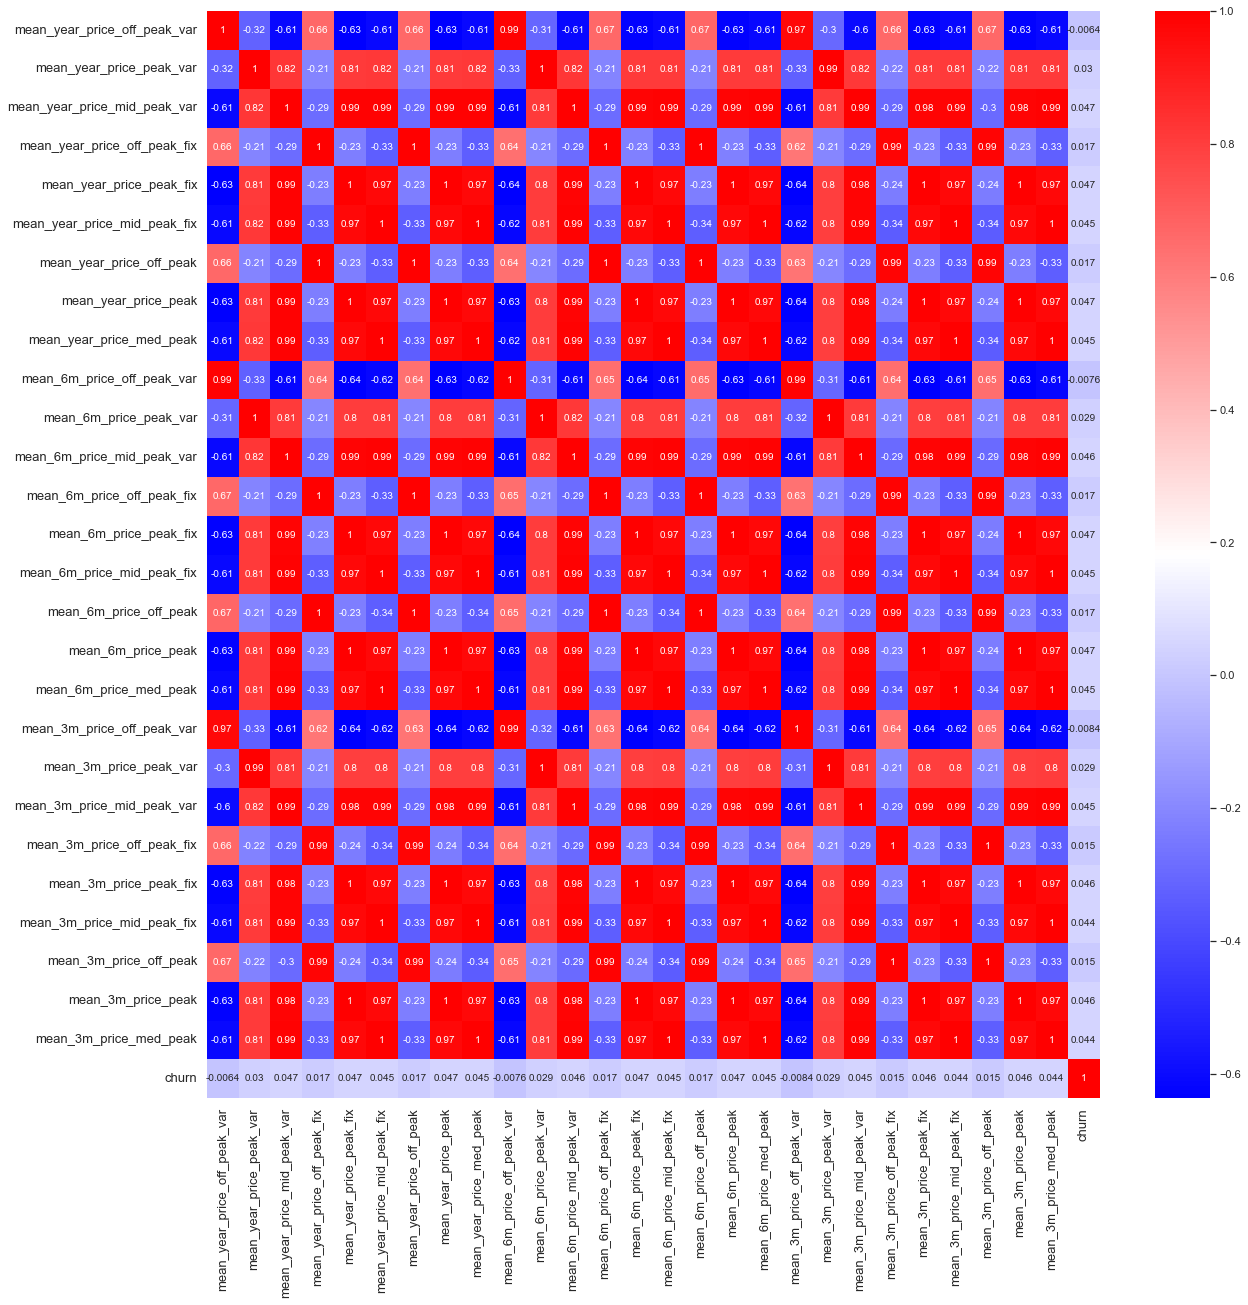

In [264]:
corr = mergedf.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='bwr', annot = True, annot_kws={'size':10})
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

The correlation between churn and prices variables is very low, which mean customers' churn is not sensitive to price change.

Now, we will merge the client data with price churn data for modeling in the next move.

In [265]:
churn_data = pd.merge(df1.drop(columns=['churn']), mergedf, on='id')
churn_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_off_peak_var,mean_3m_price_peak_var,mean_3m_price_mid_peak_var,mean_3m_price_off_peak_fix,mean_3m_price_peak_fix,mean_3m_price_mid_peak_fix,mean_3m_price_off_peak,mean_3m_price_peak,mean_3m_price_med_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.140172,0.000000,0.000000,44.444710,0.000000,0.000000,44.584882,0.000000,0.000000,0
14601,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.102352,0.093181,0.070990,59.173468,36.490689,8.367731,59.275820,36.583870,8.438721,1
14602,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,1
14603,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0


In [267]:
churn_data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn2',
       'channel_sales_encoded', 'channel_sales2',
       'mean_year_price_off_peak_var', 'mean_year_price_peak_var',
       'mean_year_price_mid_peak_var', 'mean_year_price_off_peak_fix',
       'mean_year_price_peak_fix', 'mean_year_price_mid_peak_fix',
       'mean_year_price_off_peak', 'mean_year_price_peak',
       'mean_year_price_med_peak', 'mean_6m_price_off_peak_var',
       'mean_6m_price_peak_var', 'mean_6m_price_mid_peak_var',
       'mean_6m_price_off_peak_fix

In [275]:
selch_data = churn_data[['cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'channel_sales_encoded', 'channel_sales2',
       'churn']]

## 2. Correlation Between Churn with Other Factor

In [276]:
# Menghitung nilai korelasi antara semua kolom dengan 'churn'
correll = selch_data.corr()['churn'].sort_values(ascending=False)

print(correll)

churn                             1.000000
margin_net_pow_ele                0.095780
margin_gross_pow_ele              0.095733
forecast_meter_rent_12m           0.044228
net_margin                        0.041136
pow_max                           0.030355
forecast_price_energy_peak        0.029332
channel_sales2                    0.029149
channel_sales_encoded             0.029149
forecast_discount_energy          0.017044
forecast_price_pow_off_peak       0.014776
forecast_cons_12m                 0.012946
imp_cons                         -0.001593
forecast_cons_year               -0.002567
forecast_price_energy_off_peak   -0.010815
nb_prod_act                      -0.014908
cons_gas_12m                     -0.037954
cons_last_month                  -0.045290
cons_12m                         -0.045974
num_years_antig                  -0.074172
Name: churn, dtype: float64


Factors other than price that have higher positive correlation with churn are gross margin on power subscription and net margin on power subscription.


Factors other than price  that have high negative correlation with churn are antiquity of the client, electricity consumption, and gas consumption.

In [271]:
#save data
churn_data.to_csv("dataeda.csv")